# Task 3: Basic Data Visualization
##Objectives:
- Create bar plots, line charts, and scatter plots.

- Customize plot labels, titles, and legends.

- Export plots as images for reports.

# Step 1 — Load and Prepare Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset

from google.colab import files
uploaded = files.upload()

# Load the dataset into  pandas DataFrame
df = pd.read_csv('2) Stock Prices Data Set.csv')


# Standardize column names
df.columns = [col.strip().lower() for col in df.columns]

# Convert date column to datetime and sort
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])
df.sort_values(['symbol', 'date'], inplace=True)

# Basic check
print(df.info())
print(df.head())


Saving 2) Stock Prices Data Set.csv to 2) Stock Prices Data Set.csv
<class 'pandas.core.frame.DataFrame'>
Index: 497472 entries, 57 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   symbol  497472 non-null  object        
 1   date    497472 non-null  datetime64[ns]
 2   open    497461 non-null  float64       
 3   high    497464 non-null  float64       
 4   low     497464 non-null  float64       
 5   close   497472 non-null  float64       
 6   volume  497472 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 30.4+ MB
None
     symbol       date   open    high    low  close   volume
57        A 2014-01-02  57.10  57.100  56.15  56.21  1916160
540       A 2014-01-03  56.39  57.345  56.26  56.92  1866651
1023      A 2014-01-06  57.40  57.700  56.56  56.64  1777472
1506      A 2014-01-07  56.95  57.630  56.93  57.45  1463208
1989      A 2014-01-08  57.33

##Interpretation

The dataset contains stock information (symbol, date, open, high, low, close, volume).

- Date is converted to datetime for time-based visualizations.

- Sorting ensures chronological order per stock.

# Step 2 — Line Chart (Close Price Over Time)

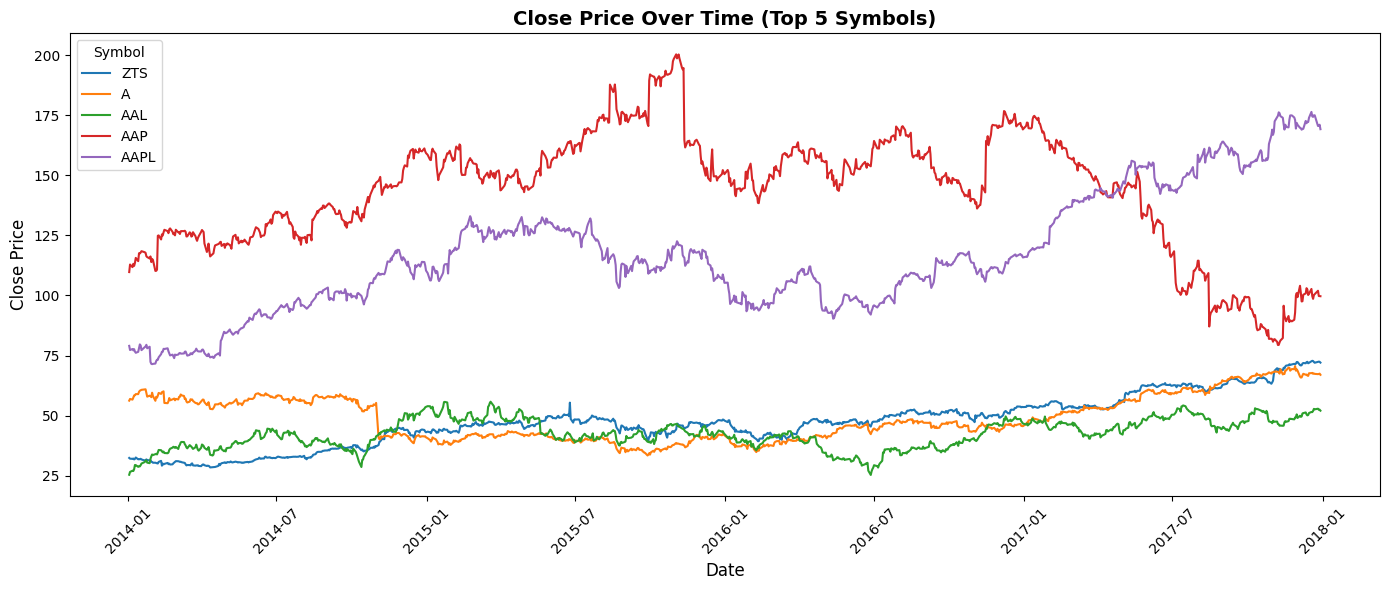

In [2]:
# Select top 5 symbols by record count
top_symbols = df['symbol'].value_counts().nlargest(5).index.tolist()

plt.figure(figsize=(14,6))
for sym in top_symbols:
    stock_data = df[df['symbol'] == sym]
    plt.plot(stock_data['date'], stock_data['close'], label=sym.upper(), linewidth=1.5)

plt.title("Close Price Over Time (Top 5 Symbols)", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.legend(title="Symbol", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##What this shows

A time-series line chart of closing prices for the top 5 stocks.

##Professional Interpretation:

- Observe trends: upward trends indicate bullish markets, downward trends indicate bearish movements.

- Sharp peaks/dips may correspond to earnings announcements, news events, or volatility periods.

- Useful for time-series analysis and forecasting models in IT-based finance applications.



# Step 3 — Bar Chart (Average Trading Volume per Symbol)

/tmp/ipython-input-1314247091.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_volume.values, y=[sym.upper() for sym in avg_volume.index], palette='Blues_r')


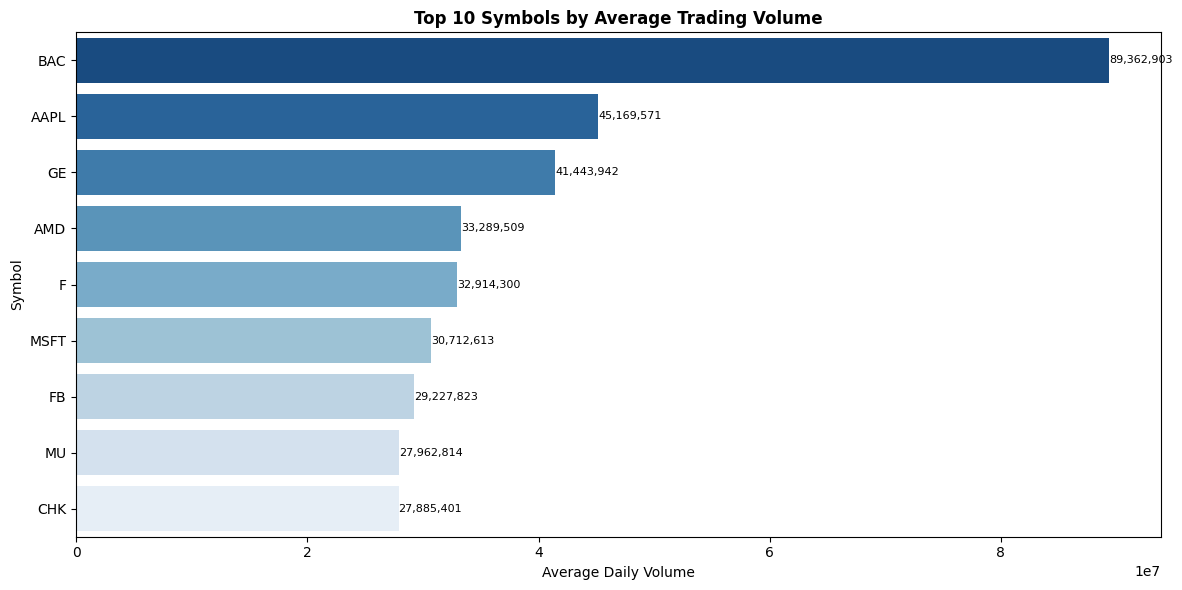

In [8]:
avg_volume = df.groupby('symbol')['volume'].mean().sort_values(ascending=False).head(9)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_volume.values, y=[sym.upper() for sym in avg_volume.index], palette='Blues_r')
plt.title("Top 10 Symbols by Average Trading Volume", fontsize=12, fontweight='bold')
plt.xlabel("Average Daily Volume", fontsize=10)
plt.ylabel("Symbol", fontsize=10)

# Annotate values
for i, v in enumerate(avg_volume.values):
    plt.text(v, i, f"{int(v):,}", va='center', fontsize=8)

plt.tight_layout()
plt.show()


##What this shows

A horizontal bar chart of the top 10 symbols with the highest average trading volume.

##Professional Interpretation

- High average volume indicates high liquidity stocks (preferred by institutional investors).

- Stocks with very low volume may be illiquid, leading to high price slippage.

- IT use case: Helps design automated trading algorithms that focus on liquid stocks.

# Step 4 — Scatter Plot (Close Price vs Volume)

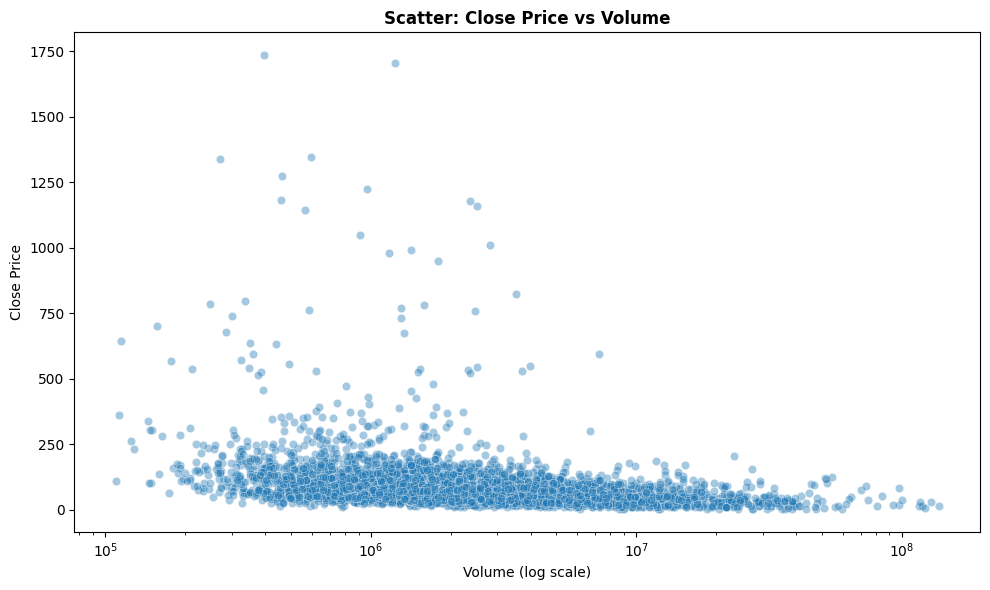

In [9]:
# Sample data for clarity
scatter_df = df.sample(n=5000, random_state=42)

plt.figure(figsize=(10,6))
sns.scatterplot(x='volume', y='close', data=scatter_df, alpha=0.4)
plt.xscale('log')
plt.title("Scatter: Close Price vs Volume", fontsize=12, fontweight='bold')
plt.xlabel("Volume (log scale)", fontsize=10)
plt.ylabel("Close Price", fontsize=10)
plt.tight_layout()
plt.show()


##What this shows

A scatter plot showing the relationship between stock price and trading volume.

##Professional Interpretation

- If points are widely dispersed with no clear slope, price and volume have weak correlation.

- If a cluster appears, it may indicate price ranges with high liquidity.

- IT relevance: Market anomaly detection systems can use such relationships.



# Step 5 — Export Plots as Images

In [6]:
output_dir = "plots"
os.makedirs(output_dir, exist_ok=True)

# Example saving last plot
plt.savefig(os.path.join(output_dir, "scatter_price_vs_volume.png"), dpi=300)


<Figure size 640x480 with 0 Axes>

##Professional Interpretation

Exporting plots ensures they can be included in reports, dashboards, and IT system documentation.

High-resolution images (300 dpi) are suitable for professional presentations.

##Final Professional Insights

- Line charts: Show historical performance for trend analysis.

- Bar charts: Identify the most actively traded stocks.

- Scatter plots: Explore relationships between liquidity (volume) and price.

All plots are styled for clarity and readability, making them ready for inclusion in IT-related financial reports or dashboards.